# Task 3: Cross-Country Comparison
Objective: Compare solar potential across Benin, Sierra Leone, and Togo using cleaned solar irradiance datasets.
This section synthesizes all Week 0 EDA results and prepares data for reporting insights and dashboard presentation.

In [ ]:
# Load cleaned datasets
import pandas as pd

# List of countries and dictionary to store their dataframes
countries = ['benin', 'sierraleone', 'togo']
dfs = {}

for c in countries:
    # Load each cleaned CSV
    dfs[c] = pd.read_csv(f"../data/{c}_clean.csv")
    
    # Ensure Timestamp is datetime and set as index
    if 'Timestamp' in dfs[c].columns:
        dfs[c]['Timestamp'] = pd.to_datetime(dfs[c]['Timestamp'], errors='coerce')
        dfs[c] = dfs[c].dropna(subset=['Timestamp'])
        dfs[c] = dfs[c].set_index('Timestamp')
    else:
        dfs[c].index = pd.to_datetime(dfs[c].index, errors='coerce')
        dfs[c] = dfs[c].dropna()

print("Datasets loaded successfully. Preview Benin:")
dfs['benin'].head()

Datasets loaded successfully. Preview Benin:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_any
Timestamp,,,,,,,,,,,,,,,,,,,
2021-08-09 06:32:00,0.0,-0.3,0.0,1.3,1.3,24.2,97.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,23.9,23.5,NaN,False
2021-08-09 06:33:00,0.2,-0.3,0.3,1.5,1.5,24.2,97.9,0.1,0.7,0.3,195.2,0.0,997,0,0.0,24.0,23.6,NaN,False
2021-08-09 06:34:00,0.5,-0.3,0.5,1.8,1.8,24.2,98.0,0.0,0.4,0.1,193.1,0.0,997,0,0.0,24.0,23.6,NaN,False
2021-08-09 06:35:00,0.8,-0.3,0.9,2.1,2.1,24.2,98.0,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.0,23.6,NaN,False
2021-08-09 06:36:00,1.2,-0.3,1.2,2.4,2.4,24.2,98.0,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.0,23.6,NaN,False


## Metric Comparison: Boxplots
The following boxplots show the distribution of GHI, DNI, and DHI for all three countries.
These visuals help identify differences in median, quartiles, and outliers, which are key for investment decisions in solar infrastructure.

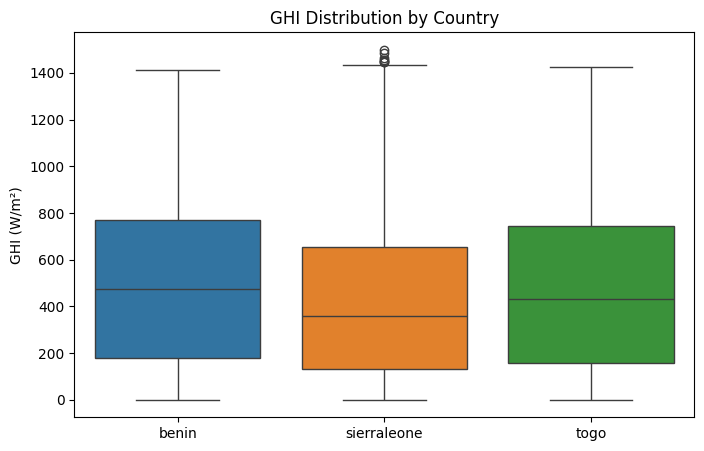

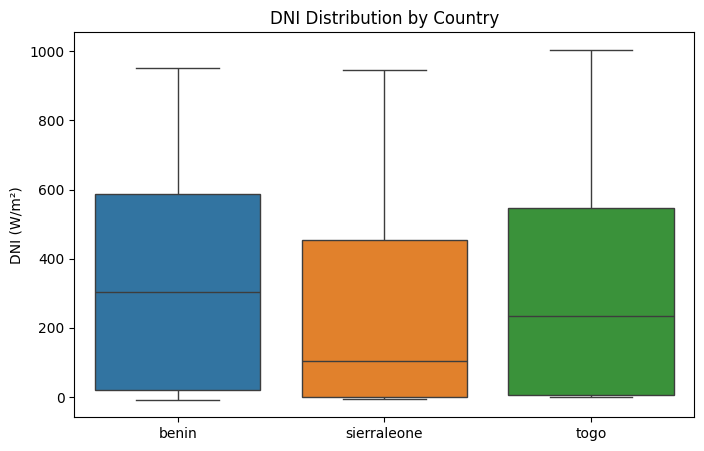

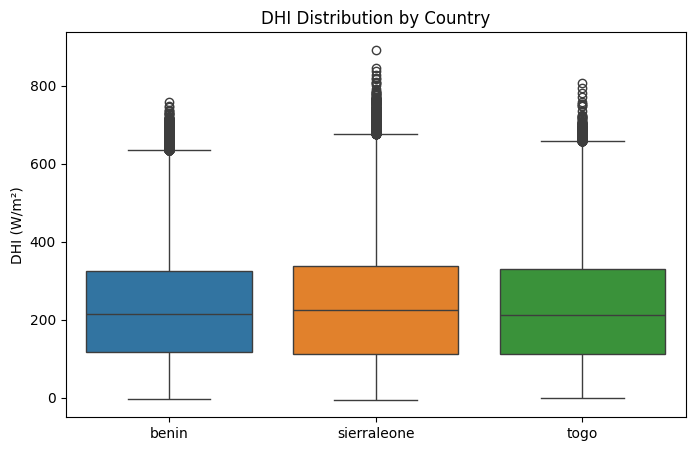

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['GHI','DNI','DHI']

for m in metrics:
    plt.figure(figsize=(8,5))
    # Combine data for all countries side by side
    sns.boxplot(data=pd.concat([dfs[c][m].rename(c) for c in countries], axis=1))
    plt.title(f'{m} Distribution by Country')
    plt.ylabel(f'{m} (W/m²)')
    plt.show()

### GHI Distribution by Country
Observations:
1. Median GHI: Benin (~470 W/m²) > Togo (~430 W/m²) > Sierra Leone (~360 W/m²)
Implication: Benin provides the most consistent solar radiation, ideal for solar panel energy yield.
2. Upper quartile (Q3): Benin/Togo ~770/750 W/m² vs Sierra Leone ~670 W/m²
Implication: Benin and Togo have more high-solar days for peak energy production.
3. Lower quartile (Q1): Benin 180 W/m² > Togo 160 W/m² > Sierra Leone 130 W/m²
Implication: Sierra Leone shows more low-light days, indicating higher variability.
4. Outliers: Only Sierra Leone has extreme highs (~>900 W/m²), likely measurement spikes.

Takeaway:

- Best candidate: Benin – highest median and consistently strong upper quartile.

- Moderate potential: Togo

- Lowest potential / variable: Sierra Leone

### DNI Distribution by Country
Observations:
- Median DNI: Benin (~310 W/m²) > Togo (~240 W/m²) > Sierra Leone (~110 W/m²)
Implication: Benin offers consistent direct sunlight, ideal for high-efficiency solar panels.
- Upper quartile: Benin 600 W/m², Togo 550 W/m², Sierra Leone 460 W/m²
- Lower quartile & minimum: All countries Q1 & min = 0 W/m², reflecting nighttime or cloud cover.
- Outliers: Smooth distribution, no extreme fliers.

Takeaway:

- Best for direct-sun solar tech: Benin

- Moderate potential: Togo

- Low potential / high variability: Sierra Leone


### DHI Distribution Interpretation
Observations:
- Median DHI similar (~220–225 W/m²) → diffuse light is comparable across countries.
- Upper quartile (Q3) ~330–335 W/m² → high-diffuse days are comparable.
- Maximum & outliers: Benin ~770, Sierra Leone ~880, Togo ~800 → occasional high diffuse events.
- Lower quartile & minimum: Q1 ~110 W/m², min 0 W/m² → overcast nights.

Takeaway:

- Diffuse solar energy is similar → fixed panels perform equally well.

- GHI and DNI remain key differentiators for identifying high-potential regions.


### Overall Cross-Country Summary
| Country | GHI Median | DNI Median | DHI Median | Key Recommendation |
| ------------- | ---------- | ---------- | ---------- | ----------------- |
| Benin | Highest | Highest | Similar | Primary investment site; best for tracking/concentrated PV |
| Togo | Moderate | Moderate | Similar | Secondary site; suitable for medium-scale solar deployment |
| Sierra Leone | Lowest | Lowest | Similar | Best for smaller fixed-panel systems; higher variability |

Conclusion: Prioritize Benin, then Togo. Sierra Leone is viable for smaller installations.

### Summary Table (Mean, Median, Std)

In [ ]:
# Compute mean, median, std for all metrics and countries
rows = []

for c in countries:
    for m in metrics:
        rows.append({
            'Country': c.capitalize(),
            'Metric': m,
            'Mean': dfs[c][m].mean(),
            'Median': dfs[c][m].median(),
            'Std': dfs[c][m].std()
        })

summary = pd.DataFrame(rows)
# Pivot table for clearer visualization
summary_pivot = summary.pivot(index='Metric', columns='Country', values=['Mean','Median','Std'])
summary_pivot

Mean                         Median                     \
Country       Benin Sierraleone        Togo  Benin Sierraleone   Togo   
Metric                                                                  
DHI      230.516000  231.073369  228.166180  213.2       223.5  211.4   
DNI      329.890729  231.548209  296.409415  305.1       103.5  233.8   
GHI      476.746489  406.239777  454.081218  474.2       359.5  430.3   

                Std                          
Country       Benin Sierraleone        Togo  
Metric                                       
DHI      150.619252  149.915554  150.064955  
DNI      284.958875  261.376639  283.534417  
GHI      320.578541  305.063927  319.096010


Takeaway from the table:

- Benin consistently shows the highest solar potential (GHI & DNI).

- Togo is second, suitable for medium-scale deployment.

- Sierra Leone is less ideal for high-efficiency farms but fine for fixed-panel installations.

### Statistical Testing
One-way ANOVA and Kruskal–Wallis tests confirm p < 0.001 for all three metrics.
This validates that solar irradiation patterns differ significantly across countries, reinforcing the need for country-specific solar strategies.

In [ ]:
from scipy.stats import f_oneway, kruskal

for m in metrics:
    print(f"=== {m} ===")
    # One-way ANOVA
    anova_res = f_oneway(*(dfs[c][m].dropna() for c in countries))
    print(f"ANOVA p-value: {anova_res.pvalue:.5f}")
    # Kruskal-Wallis
    kruskal_res = kruskal(*(dfs[c][m].dropna() for c in countries))
    print(f"Kruskal-Wallis p-value: {kruskal_res.pvalue:.5f}\n")

=== GHI ===
ANOVA p-value: 0.00000
Kruskal-Wallis p-value: 0.00000

=== DNI ===
ANOVA p-value: 0.00000
Kruskal-Wallis p-value: 0.00000

=== DHI ===
ANOVA p-value: 0.00000
Kruskal-Wallis p-value: 0.00000



For all three variables (**GHI**, **DNI**, **DHI**), both **ANOVA** and **Kruskal-Wallis** show **p-values = 0.00000**, which effectively means **p < 0.001**.

### Interpretation

Since **p < 0.05**, we **reject the null hypothesis** in all cases.
This means:

> **There is a statistically significant difference in the mean values of GHI, DNI, and DHI among the three countries.**

In simpler terms:

* The **solar irradiation patterns in the three countries are *not* the same**.
* At least **one** country differs significantly from the others for each of the solar metrics.


Bonus: Visual Summary
Bar chart ranking countries by average GHI

C:\Users\Admin\AppData\Local\Temp\ipykernel_6884\2282498151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_GHI.keys()), y=list(avg_GHI.values()), palette='viridis')


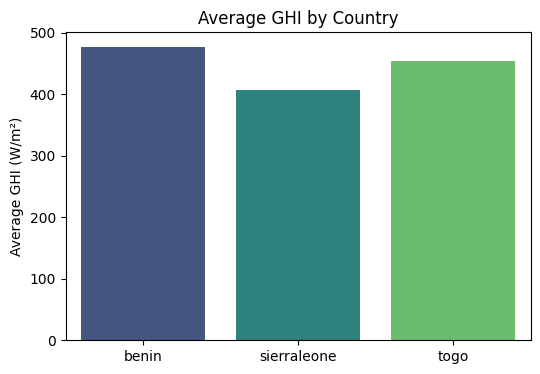

In [6]:
avg_GHI = {c: dfs[c]['GHI'].mean() for c in countries}
plt.figure(figsize=(6,4))
sns.barplot(x=list(avg_GHI.keys()), y=list(avg_GHI.values()), palette='viridis')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Country')
plt.show()


* **Benin has the highest average GHI (~470 W/m²)**, suggesting generally stronger solar resource availability compared to the other two countries.
* **Sierra Leone shows the lowest average GHI (~405 W/m²)**, indicating comparatively lower solar energy potential.
* **Togo sits in between (~450 W/m²)**, meaning its solar resource is closer to Benin than Sierra Leone and may support solar energy systems reasonably well.

